# درباره‌ی الی
علیرضا حبیب زاده

## نام:

## شماره‌ی دانشجویی:

در دنیای The Last of Us
بیماری قارچی به نام Cordyceps به وجود آمده است که انسان‌ها را به زامبی‌هایی تبدیل می‌کند. این بیماری از طریق تماس مستقیم با زامبی‌ها یا تماس با قارچ‌های آلوده به انسان‌ها منتقل می‌شود. انسان‌های آلوده به این بیماری به زامبی‌ها تبدیل می‌شوند و انسان‌های سالم باید از آن‌ها دفاع کنند. ا

الی که به تازگی در مدرسه‌ی فدرال درس معادلات دیفرانسیل را گذرانده تصمیم می‌گیرد تا جمعیت زامبی‌ها و انسان‌ها را مدل کند.

تعداد انسان‌ها را با $h$ نشان می‌دهیم. انسان‌ها زاد و ولد می‌کنند که متناسب با جمعیتشان است پس
$\frac{dh}{dt} = \alpha h$
اما در 


معادلات ساده‌ی مرتبه اول لوتکا-ولتررا تغییر جمعیت انسان‌ها و زامبی‌ها مدل می‌کند. این معادلات به صورت زیر است:

\begin{aligned}{\frac {dh}{dt}}&=\alpha h-\beta hz,\\{\frac {dz}{dt}}&=\delta hz-\gamma z,\end{aligned}

\begin{aligned}{\frac {dh}{dt}}&=\alpha h_0 \tanh{\frac{h}{h_0}}-\beta hz,\\{\frac {dz}{dt}}&=\delta hz-\gamma z\end{aligned}

که در صورتی که با خواص تابع
tanh
 آشنا باشید می‌دانید که در hهای بزرگ جمله‌ی زاد و ولد به $\alpha h_0$ میل می‌کند و در hهای کوچک به صورت خطی بعنی $\alpha h$ عمل می‌کند (مثل معادلات قبل)

تابع f(h, z) را طوری تعریف کنید که با گرفتن جمعیت زامبی‌ها و انسان‌ها مشتق جمعیت را به ترتیب برگرداند. در واقع کل معادله‌ی دیفرانسیل را در این تابع می‌گنجانیم.

In [1]:
import numpy as np

def human_zombie_dynamic(t, h, z, alpha, beta, delta, gamma, h0) -> np.ndarray:
    return np.array([alpha * h0 * np.tanh(h / h0) - beta * h * z, delta * h * z - gamma * z])

def dynamic_generator(alpha, beta, delta, gamma, h0):
    return lambda t, x: human_zombie_dynamic(t, x[0], x[1], alpha, beta, delta, gamma, h0)

$$
\begin{align*}
k_1 &= dt f(t_n, x_n) \\
k_2 &= dt f\left(t_n + \frac{dt}{2}, x_n + \frac{1}{2} \cdot k_1\right) \\
k_3 &= dt f\left(t_n + \frac{dt}{2}, x_n + \frac{1}{2} \cdot k_2\right) \\
k_4 &= dt f(t_n + dt, x_n + k_3) \\
x_{n+1} &= x_n + \frac{1}{6} \cdot (k_1 + 2k_2 + 2k_3 + k_4)
\end{align*}
$$

In [2]:
def runge_kutta(f, x0, t0, tf, dt):
    """
    Solve a system of differential equations using the Runge-Kutta method.

    Parameters:
        f: function
            The function defining the system of differential equations.
            It should accept two arguments: t (time) and x (state vector).
        x0: array-like
            Initial state vector.
        t0: float
            Initial time.
        tf: float
            Final time.
        dt: float
            Step size.

    Returns:
        t_values: array
            Array of time values.
        x_values: array
            Array of state vectors corresponding to the time values.
    """
    t_values = np.arange(t0, tf + dt, dt)
    num_steps = len(t_values)
    dim = len(x0)
    x_values = np.zeros((num_steps, dim))
    x_values[0] = x0

    for i in range(num_steps - 1):
        k1 = dt * f(t_values[i], x_values[i])
        k2 = dt * f(t_values[i] + dt / 2, x_values[i] + k1 / 2)
        k3 = dt * f(t_values[i] + dt / 2, x_values[i] + k2 / 2)
        k4 = dt * f(t_values[i] + dt, x_values[i] + k3)
        
        x_values[i + 1] = x_values[i] + (k1 + 2 * k2 + 2 * k3 + k4) / 6

    return t_values, x_values

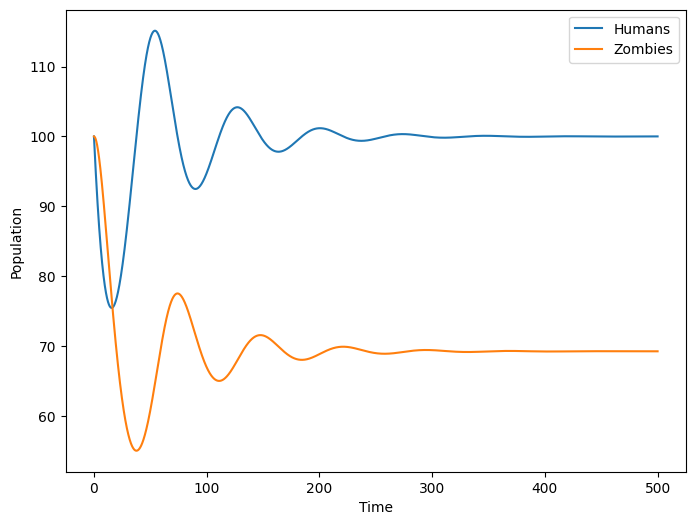

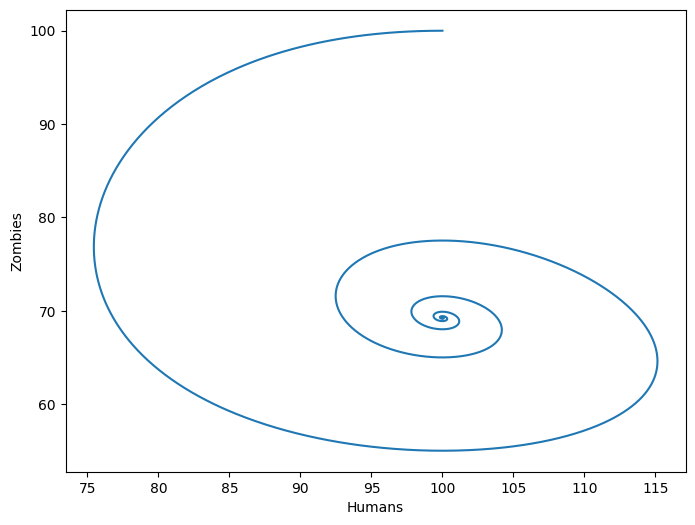

In [15]:
import matplotlib.pyplot as plt

alpha = 0.1
beta = 0.0011
delta = 0.001
gamma = 0.1
h0 = 100

x0 = np.array([100, 100])
t0 = 0
tf = 500
dt = 0.08

f1 = dynamic_generator(alpha, beta, delta, gamma, h0)

def plot_population(f, x0, t0, tf, h):
    plt.figure(figsize=(8, 6))
    t_values, x_values = runge_kutta(f, x0, t0, tf, h)
    plt.plot(t_values, x_values)
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.legend(['Humans', 'Zombies'])
    plt.show()
        
    plt.figure(figsize=(8, 6))
    plt.plot(x_values[:, 0], x_values[:, 1])
    plt.xlabel('Humans')
    plt.ylabel('Zombies')
    plt.show()
    
plot_population(f1, x0, t0, tf, dt)

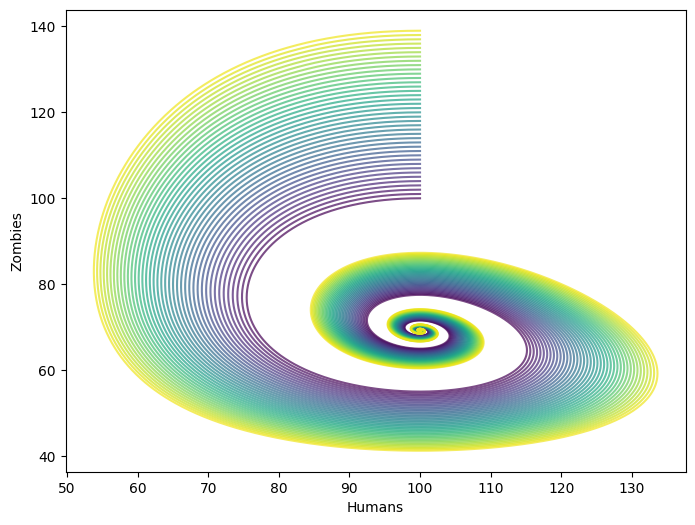

In [29]:
# Now we plot the phase portrait of the system. (For multiple initial conditions)
plt.figure(figsize=(8, 6))

def plot_phase_portrait(f, x0_values, t0, tf, h):
    cmap = plt.get_cmap('viridis')
    num_colors = len(x0_values)
    colors = [cmap(i / num_colors) for i in range(num_colors)]

    for i, x0 in enumerate(x0_values):
        t_values, x_values = runge_kutta(f, x0, t0, tf, h)
        plt.plot(x_values[:, 0], x_values[:, 1], color=colors[i], alpha=0.7)

    plt.xlabel('Humans')
    plt.ylabel('Zombies')
    plt.show()


# 40 initial conditions for the phase portrait
x0_values = np.array([[100, 100 + i] for i in range(40)])
plot_phase_portrait(f1, x0_values, t0, tf, dt)

## امتیازی
بسته به خلاقیت خود با پارامترها بازی کنید و تغییرات را مشاهده کنید. یکی از حالاتی که به نظرتان جالب است را توصیف کنید. به معنی پارامترهایی که قرار دادید توجه کنید.

جدول معانی:
- $\alpha$:  نرخ تولد منهای نرخ مرگ انسان‌ها
- $\beta$: نرخ تبدیل انسان‌ها به زامبی‌ها
- $\delta$: نرخ تبدیل انسان‌ها به زامبی منهای نرخ کشتن زامبی‌ها توسط انسان‌ها
- $\gamma$: نرخ مرگ طبیعی زامبی‌ها
- $h_0$: حد آستانه جمعیت انسان‌ها

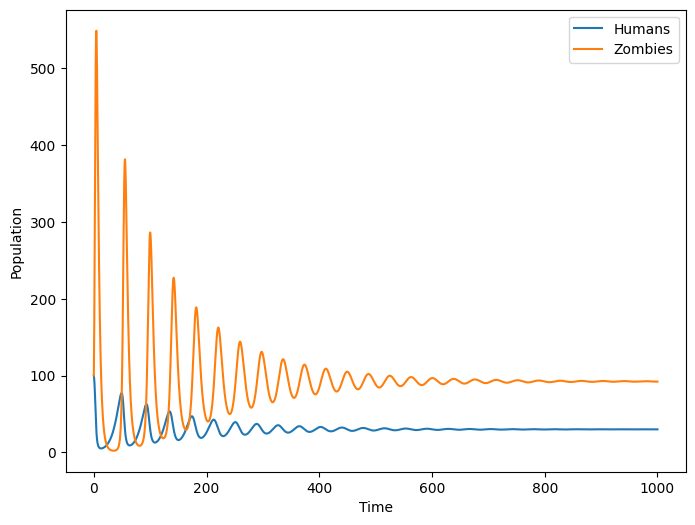

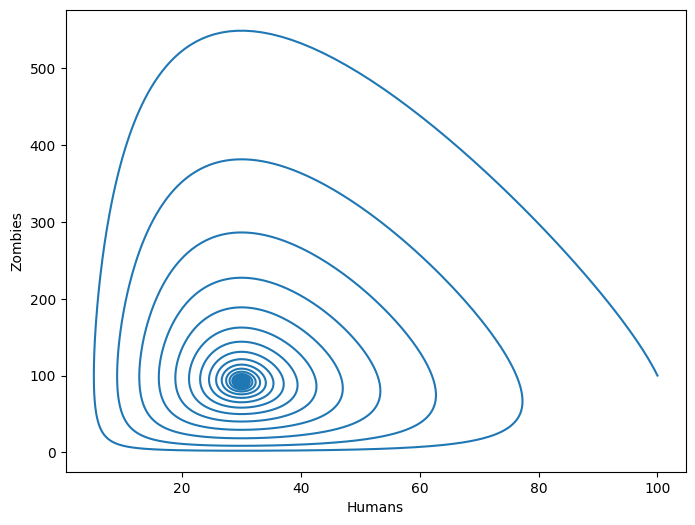

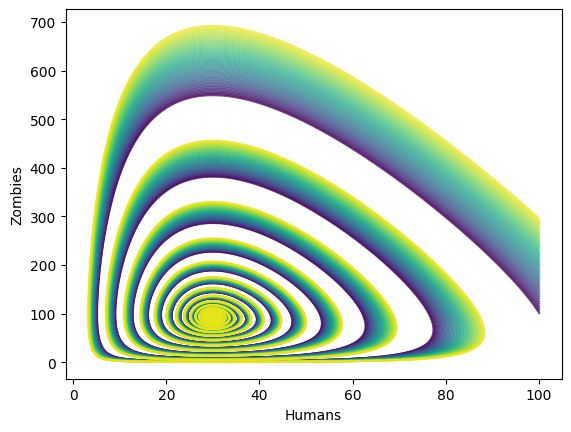

In [31]:
alpha = 0.1
beta = 0.001
delta = 0.01
gamma = 0.3
h0 = 60

x0 = np.array([100, 100])
t0 = 0
tf = 1000
dt = 0.1

f2 = dynamic_generator(alpha, beta, delta, gamma, h0)
plot_population(f2, x0, t0, tf, dt)

x0_values = np.array([[100, 100 + i] for i in range(1, 200, 5)])
plot_phase_portrait(f2, x0_values, t0, tf, dt)

## نقطه‌ی تعادل

حتما در نمودار بالا متوجه شدید که سیستم به نقطه‌ای میل کرده است.
نقطه‌ی تعادل جایی نیست که زامبی‌ها و انسان‌ها با هم به خوبی و خوشی زندگی می‌کنند، بلکه از نظر ما جایی است که به طور متوسط جمعیت زامبی‌ها و انسان‌ها تغییر نمی‌کند. (البته لزوما سیستم به همه‌ی نقاط تعادل میل نمی‌کند و ممکن است «پایدار» نباشند.) حال می‌خواهیم این نقطه را پیدا کنیم. در این نقطه:

\begin{aligned}{\frac {dh}{dt}}&=\alpha h_0 \tanh{\frac{h^*}{h_0}}-\beta h^*z^* = 0,\\{\frac {dz}{dt}}&=\delta h^*z^*-\gamma z^* = 0\end{aligned}
اما بر خلاف معادلات مدل خطی به دلیل وجود عامل
tanh
این معادلات را برای مدل ما نمی‌توان به صورت تحلیلی حل کرد. برای پیدا کردن نقطه‌ی تعادلی باید از روش‌های عددی استفاده کنیم.



In [75]:
def newton_raphson(f, x0, iter=100):
    x = x0
    for _ in range(iter):
        f_x = f(0, x)  # Time is not used in the function
        if np.linalg.norm(f_x) < 1e-6:
            return x
        J = np.array([[f_x[0], -x[1]], [delta * x[1], -gamma]])
        x = x - np.linalg.inv(J) @ f_x
    return x

newton_raphson(f1, np.array([100, 100]))  # Change the starting point if you wish

array([99.98870965, 84.06639516])